# Data Query 
## Which photographers does the V&A hold ?
### Mar 2021

To answer this we need to query object types of "photograph" and "photographs" and cluster by 'maker'.

We show a treemap visualisation of the top 50 results for each, and then CSV exports of the top 100 (max allowed at present)


In [6]:
from IPython.display import display

def Vega(spec):
    bundle = {}
    bundle['application/vnd.vega.v5+json'] = spec
    display(bundle, raw=True)

def treemap(clusters, cluster_name):
    
  clusters_json = [{"id": index+1, "name": [x["value"], x["count"]], "parent": '0', "value": x["count"]} for index, x in enumerate(clusters)]
  clusters_json.insert(0, {"id": 0, "value": 0, "name": cluster_name})
    
  Vega({
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "An example of treemap layout for hierarchical data.",
  "width": 1200,
  "height": 800,
  "padding": 2.5,
  "autosize": "none",
  "data": [
    {
      "name": "tree",
      "values": clusters_json,
      "transform": [
        {
          "type": "stratify",
          "key": "id",
          "parentKey": "parent"
        },
        {
          "type": "treemap",
          "field": "value",
          "sort": {"field": "value", "order": "descending"},
          "round": True,
          "size": [{"signal": "width"}, {"signal": "height"}]
        }
      ]
    },
    {
      "name": "nodes",
      "source": "tree",
      "transform": [{ "type": "filter", "expr": "datum.children" }]
    },
    {
      "name": "leaves",
      "source": "tree",
      "transform": [{ "type": "filter", "expr": "datum.parent == 0" }]
    }
  ],

  "scales": [
    {
      "name": "color",
      "type": "ordinal",
      "domain": {"data": "nodes", "field": "name"},
      "range": [
        "#3182bd", "#6baed6", "#9ecae1", "#c6dbef", "#e6550d",
        "#fd8d3c", "#fdae6b", "#fdd0a2", "#31a354", "#74c476",
        "#a1d99b", "#c7e9c0", "#756bb1", "#9e9ac8", "#bcbddc",
        "#dadaeb", "#636363", "#969696", "#bdbdbd", "#d9d9d9"
      ]
    },
    {
      "name": "size",
      "type": "ordinal",
      "domain": [0, 1, 2, 3],
      "range": [256, 10, 20, 14]
    },
    {
      "name": "opacity",
      "type": "ordinal",
      "domain": [0, 1, 2, 3],
      "range": [0.15, 0.5, 0.8, 1.0]
    }
  ],

  "marks": [
    {
      "type": "rect",
      "from": {"data": "nodes"},
      "interactive": False,
      "encode": {
        "enter": {
          "fill": {"scale": "color", "field": "name"}
        },
        "update": {
          "x": {"field": "x0"},
          "y": {"field": "y0"},
          "x2": {"field": "x1"},
          "y2": {"field": "y1"}
        }
      }
    },
    {
      "type": "rect",
      "from": {"data": "leaves"},
      "encode": {
        "enter": {
          "stroke": {"value": "#fff"}
        },
        "update": {
          "x": {"field": "x0"},
          "y": {"field": "y0"},
          "x2": {"field": "x1"},
          "y2": {"field": "y1"},
          "fill": {"value": "transparent"},
          "href": {"value": "https://collections.vam.ac.uk/"}
        },
        "hover": {
          "fill": {"value": "green"}
        }
      }
    },
    {
      "type": "text",
      "from": {"data": "leaves"},
      "interactive": False,
      "encode": {
        "enter": {
          "font": {"value": "Helvetica Neue, Arial"},
          "align": {"value": "center"},
          "baseline": {"value": "middle"},
          "fill": {"value": "#000"},
          "text": {"field": "name"},
          "fontSize": {"scale": "size", "field": "depth"},
          "fillOpacity": {"scale": "opacity", "field": "depth"}
        },
        "update": {
          "x": {"signal": "0.5 * (datum.x0 + datum.x1)"},
          "y": {"signal": "0.5 * (datum.y0 + datum.y1)"}
        }
      }
    }
  ]
}
)

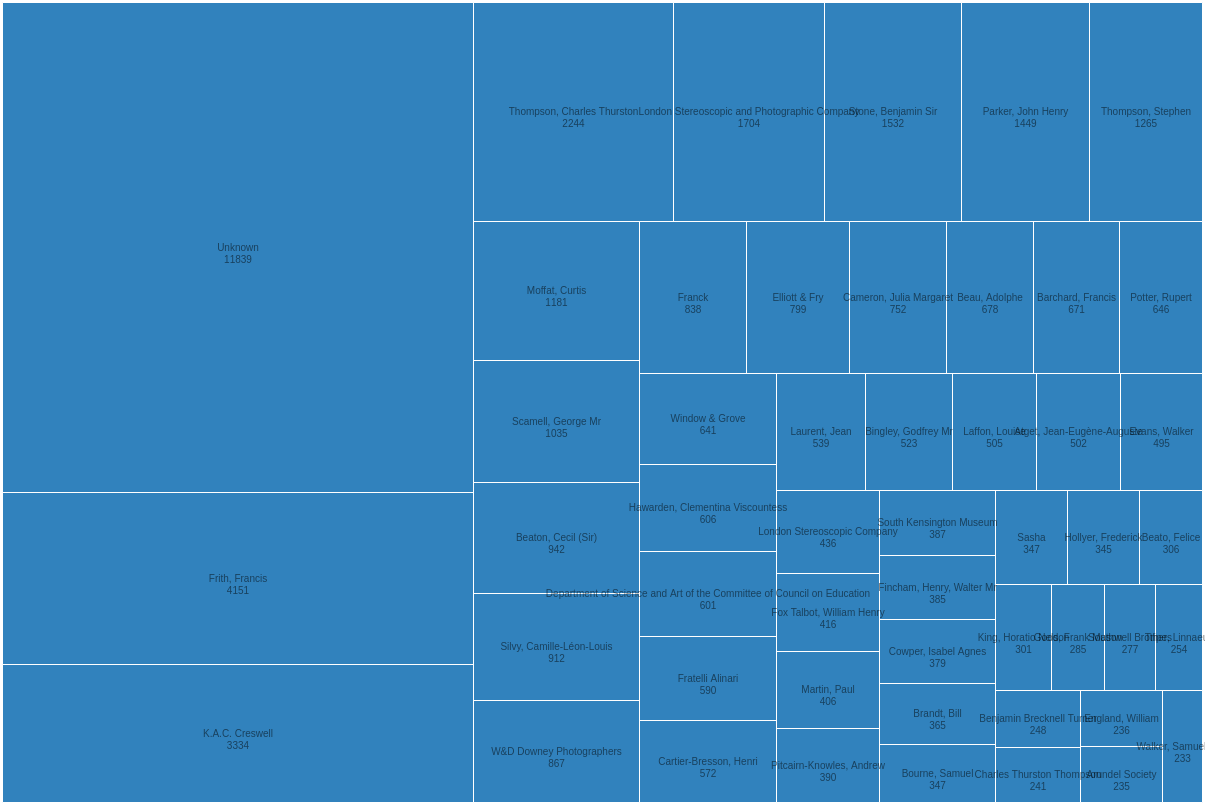

In [7]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/maker/search?kw_object_type=Photograph&cluster_size=50')
treemap(req.json(), "Photographers")

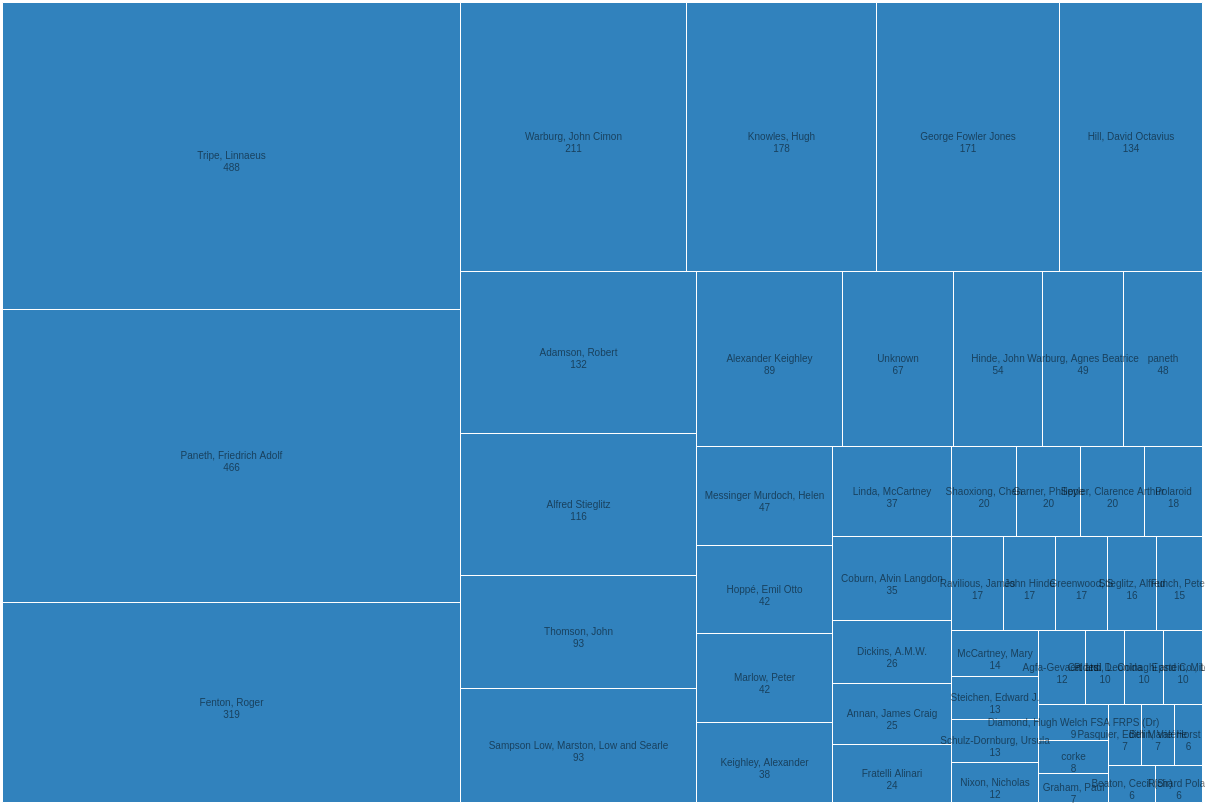

In [11]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/maker/search?kw_object_type=Photographs&cluster_size=50')
treemap(req.json(), "Photographer")

In [24]:
import pandas as pd
df_photograph = pd.read_json('https://api.vam.ac.uk/v2/objects/clusters/person/search?kw_object_type=Photograph&cluster_size=100', orient='records')
df_photograph.to_csv("photograph-top-100.csv")

In [23]:

import pandas as pd
df_photographs = pd.read_json('https://api.vam.ac.uk/v2/objects/clusters/person/search?kw_object_type=photographs&cluster_size=100', orient='records')
df_photographs.to_csv("photographs-top-100.csv")